In [7]:
import numpy as np
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(x[1,1:2])

[5]


In [10]:
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 2))
print(vv)

[[1 0 1 1 0 1]
 [1 0 1 1 0 1]
 [1 0 1 1 0 1]
 [1 0 1 1 0 1]]


In [12]:
v = np.array([1,2,3]) # v has shape (3,)
w = np.array([4,5]) # w has shape (2,)
print(np.reshape(v, (3, 1)))
print(np.reshape(v, (3, 1)) * w)

[[1]
 [2]
 [3]]
[[ 4  5]
 [ 8 10]
 [12 15]]


In [15]:
from PIL import Image
import requests

In [17]:
r = requests.get('https://res.cloudinary.com/akame-moe/image/upload/v1531359060/2018/07/screenshot_001.jpg')
with open('wallpaper.jpg','wb') as f:
    f.write(r.content)

In [ ]:
from IPython.display import display



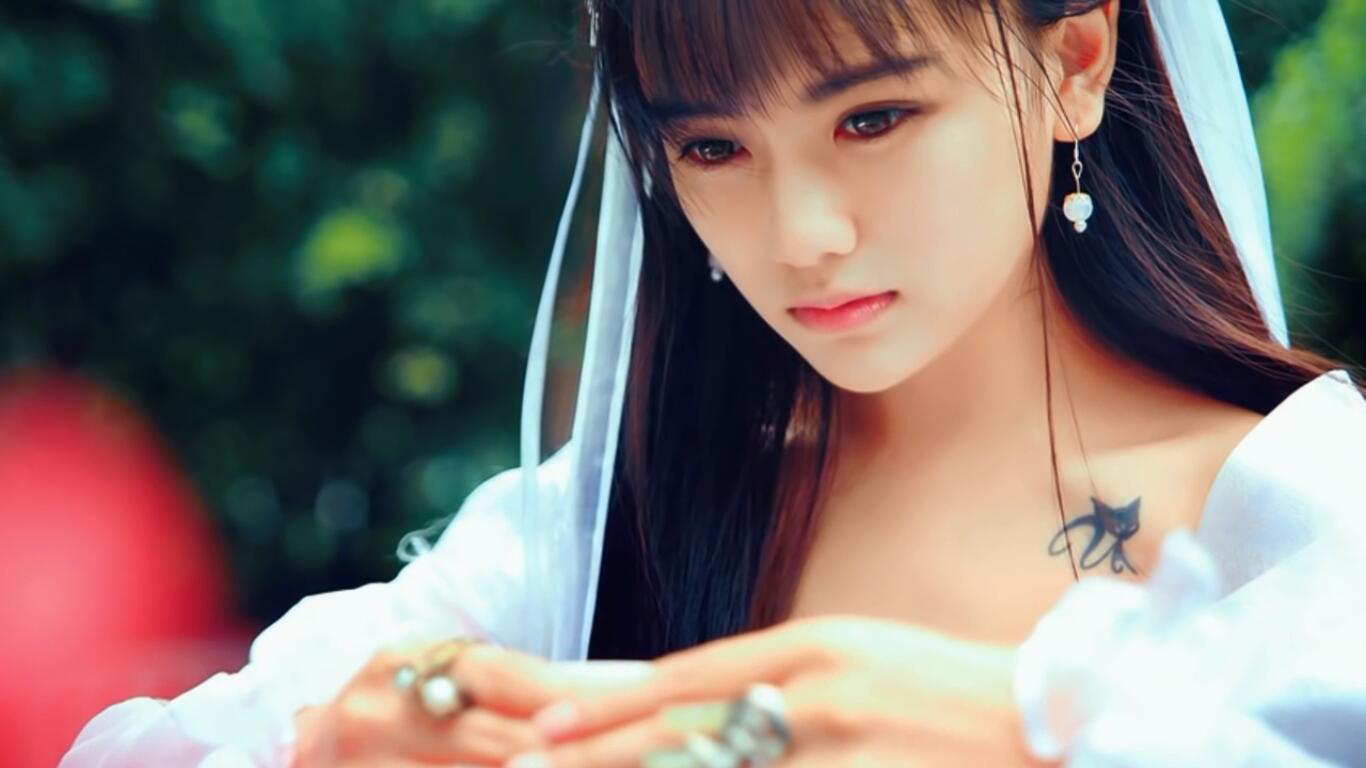

In [18]:
im = Image.open('wallpaper.jpg')
display(im)

In [ ]:

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
 
#初始化权重函数
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1);
    return tf.Variable(initial)
 
#初始化偏置项
def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)
 
#定义卷积函数
def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding='SAME')
 
#定义一个2*2的最大池化层
def max_pool_2_2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
 
if __name__ == "__main__":
    #定义输入变量
    x = tf.placeholder("float",shape=[None,784])
    #定义输出变量
    y_ = tf.placeholder("float",shape=[None,10])
    #初始化权重,第一层卷积，32的意思代表的是输出32个通道
    # 其实，也就是设置32个卷积，每一个卷积都会对图像进行卷积操作
    w_conv1 = weight_variable([5,5,1,32])
    #初始化偏置项
    b_conv1 = bias_variable([32])
    #将输入的x转成一个4D向量，第2、3维对应图片的宽高，最后一维代表图片的颜色通道数
    # 输入的图像为灰度图，所以通道数为1，如果是RGB图，通道数为3
    # tf.reshape(x,[-1,28,28,1])的意思是将x自动转换成28*28*1的数组
    # -1的意思是代表不知道x的shape，它会按照后面的设置进行转换
    x_image = tf.reshape(x,[-1,28,28,1])
    # 卷积并激活
    h_conv1 = tf.nn.relu(conv2d(x_image,w_conv1) + b_conv1)
    #池化
    h_pool1 = max_pool_2_2(h_conv1)
    #第二层卷积
    #初始权重
    w_conv2 = weight_variable([5,5,32,64])
    #初始化偏置项
    b_conv2 = bias_variable([64])
    #将第一层卷积池化后的结果作为第二层卷积的输入
    h_conv2 = tf.nn.relu(conv2d(h_pool1,w_conv2) + b_conv2)
    #池化
    h_pool2 = max_pool_2_2(h_conv2)
    # 设置全连接层的权重
    w_fc1 = weight_variable([7*7*64,1024])
    # 设置全连接层的偏置
    b_fc1 = bias_variable([1024])
    # 将第二层卷积池化后的结果，转成一个7*7*64的数组
    h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])
    # 通过全连接之后并激活
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,w_fc1) + b_fc1)
    # 防止过拟合
    keep_prob = tf.placeholder("float")
    h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)
 
    #输出层
    w_fc2 = weight_variable([1024,10])
    b_fc2 = bias_variable([10])
 
    y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop,w_fc2) + b_fc2)
 
    #日志输出，每迭代100次输出一次日志
    #定义交叉熵为损失函数
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))
    #最小化交叉熵
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    #计算准确率
    correct_prediction = tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
    sess = tf.Session()
    sess.run(tf.initialize_all_variables())
    # 下载minist的手写数字的数据集
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    for i in range(20):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(session=sess,feed_dict={x:batch[0],y_:batch[1],keep_prob:1.0})
            print("step %d,training accuracy %g"%(i,train_accuracy))
        train_step.run(session = sess,feed_dict={x:batch[0],y_:batch[1],keep_prob:0.5})
 
    print("test accuracy %g" % accuracy.eval(session=sess,feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
    #test accuracy 0.9919


In [ ]:
dir(im)